# Patch CNN Baseline

In this notebook, we develop an approach which consists in using a CNN to directly classify the patches (as presented in tutorial 10).

In [1]:
import os
from glob import glob
import torch

from src_notebooks.utils import *
from src_notebooks.models import PatchCNN
from src_notebooks.pytorch_utils import *
from src_notebooks.dataset_augmentation import augment_dataset

In [ ]:
# Create the patch dataset
if not os.path.isdir("training_patch"):
    imgs = load_images(os.path.join("training", "images"))
    masks = load_images(os.path.join("training", "groundtruth"))
    create_patch_dataset_training(
        imgs, 
        masks,
        class_label=None, # optional implicit class label 
        dir="training_patch", # directory name of the new extended dataset
    )

if not os.path.isdir("test_patch"):
    tests_imgs = load_images(os.path.join("test", "images"))
    create_patch_dataset_test(
        tests_imgs,
        class_label=None, # optional implicit class label 
        dir="test_patch", # directory name of the new extended dataset
    )

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# get filenames of all the training samples from the original dataset
image_fns = sorted(glob(os.path.join("training_patch", "images", "*.png")))

### Original Configuration

Let us train the baseline model using the exact same configuration as shown during tutorial 10. This approach results in a F1 score of about 0.828.

In [9]:
patch_cnn = PatchCNN().to(device)
history = train_model(
    model=patch_cnn,
    image_fns_train=image_fns[:-10*625],
    mask_fns_train=None,
    image_fns_val=image_fns[-10*625:],
    mask_fns_val=None,
    n_epochs=20,
    batch_size=128,
    use_patches=True,
)

Number of training samples:	83750
Number of validation samples:	6250


Epoch 1/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.47842006815044147
  	- val_loss = 0.4373547673410269
  	- acc = 0.7842802079579302
  	- val_acc = 0.799016894126425
 


Epoch 2/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.44758601969746786
  	- val_loss = 0.4186382995608461
  	- acc = 0.7949804138591271
  	- val_acc = 0.805559901558623
 


Epoch 3/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4384705787046602
  	- val_loss = 0.4272905046501404
  	- acc = 0.7975554942174722
  	- val_acc = 0.8068895607578511
 


Epoch 4/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4327264857098907
  	- val_loss = 0.4200040757423267
  	- acc = 0.8013095118617284
  	- val_acc = 0.8077529364702652
 


Epoch 5/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.42820508597551815
  	- val_loss = 0.4049923265090653
  	- acc = 0.8029718260728675
  	- val_acc = 0.8237419383866447
 


Epoch 6/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4249496536492176
  	- val_loss = 0.45781650126802415
  	- acc = 0.8058149608036944
  	- val_acc = 0.7988574553509148
 


Epoch 7/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4191449792904345
  	- val_loss = 0.45698214231684203
  	- acc = 0.8066662063125436
  	- val_acc = 0.7674359837356879
 


Epoch 8/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.419413820169725
  	- val_loss = 0.42931695676209314
  	- acc = 0.808211128948299
  	- val_acc = 0.7986047608511788
 


Epoch 9/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4144162625397193
  	- val_loss = 0.41615035534295136
  	- acc = 0.8098853706403543
  	- val_acc = 0.8119374525790312
 


Epoch 10/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.41457012046684083
  	- val_loss = 0.42366625831978083
  	- acc = 0.8113078797136555
  	- val_acc = 0.8147351510670721
 


Epoch 11/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4101607056094261
  	- val_loss = 0.3954769801348784
  	- acc = 0.811364378273942
  	- val_acc = 0.8282934634052977
 


Epoch 12/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4071115747065505
  	- val_loss = 0.3975810788727529
  	- acc = 0.8143594315033833
  	- val_acc = 0.820387707681072
 


Epoch 13/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.40638544481570443
  	- val_loss = 0.4261172523154466
  	- acc = 0.814088238286608
  	- val_acc = 0.8207938245364598
 


Epoch 14/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4026113304637888
  	- val_loss = 0.4149639021242178
  	- acc = 0.8167945209350295
  	- val_acc = 0.8094736714752353
 


Epoch 15/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.40103414092262135
  	- val_loss = 0.39461589154712773
  	- acc = 0.8161830805640184
  	- val_acc = 0.828546159121455
 


Epoch 16/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.39973891772378956
  	- val_loss = 0.40860571309786453
  	- acc = 0.8175296303880124
  	- val_acc = 0.8259349732982869
 


Epoch 17/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.39802778665385774
  	- val_loss = 0.3974954432769233
  	- acc = 0.8183645540521345
  	- val_acc = 0.8293824609445066
 


Epoch 18/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.39491179693290673
  	- val_loss = 0.40331215115479474
  	- acc = 0.8213137806826876
  	- val_acc = 0.818919667175838
 


Epoch 19/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.3935704803593964
  	- val_loss = 0.3975571477455697
  	- acc = 0.8207902270418997
  	- val_acc = 0.8316085873817911
 


Epoch 20/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.3919950065141422
  	- val_loss = 0.387135531251
  	- acc = 0.821092808337612
  	- val_acc = 0.8295960487151632
 
Finished Training


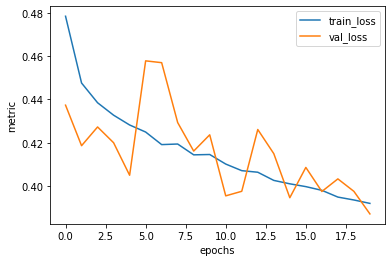

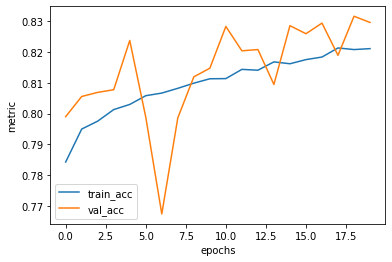

In [10]:
plot_training_history(history, metrics=['loss', 'acc'])

In [ ]:
predict_on_test_set(
    patch_cnn, 
    submission_fn="patch_cnn_baseline.csv",
    use_patches=True,
)

### Image Normalization

Now, let us add image normalization as a preprocessing step. I.e. for each image, we compute the mean and std of each color channel and use them to normalize each channel. This addition results in a F1 score of about 0.799.

In [6]:
patch_cnn = PatchCNN().to(device)
history = train_model(
    model=patch_cnn,
    image_fns_train=image_fns[:-10*625],
    mask_fns_train=None,
    image_fns_val=image_fns[-10*625:],
    mask_fns_val=None,
    n_epochs=20,
    batch_size=128,
    normalize=True,
    use_patches=True,
)

Number of training samples:	83750
Number of validation samples:	6250


Epoch 1/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.5462284357127685
  	- val_loss = 0.5256309214816062
  	- acc = 0.7529052832654415
  	- val_acc = 0.7440045001555462
 


Epoch 2/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.5195849193285845
  	- val_loss = 0.5055795038579062
  	- acc = 0.7574973634181131
  	- val_acc = 0.7496179488240456
 


Epoch 3/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.5054194678068826
  	- val_loss = 0.4967609633307712
  	- acc = 0.7630794244868154
  	- val_acc = 0.7613502363769376
 


Epoch 4/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4969257585798829
  	- val_loss = 0.4853052259334978
  	- acc = 0.7652709421310716
  	- val_acc = 0.7655347512692822
 


Epoch 5/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4900539717726606
  	- val_loss = 0.4825026943617488
  	- acc = 0.768524005667854
  	- val_acc = 0.7727094961672413
 


Epoch 6/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4839438833869986
  	- val_loss = 0.4771501982010722
  	- acc = 0.7699075934541134
  	- val_acc = 0.7748152917745162
 


Epoch 7/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.47961698822218796
  	- val_loss = 0.4757000855047365
  	- acc = 0.7702045249574967
  	- val_acc = 0.7831933486218355
 


Epoch 8/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4757902531321512
  	- val_loss = 0.4761999778574692
  	- acc = 0.7726032041411364
  	- val_acc = 0.7810334040194141
 


Epoch 9/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.47189483765625884
  	- val_loss = 0.4671570316334422
  	- acc = 0.7735096926907546
  	- val_acc = 0.7885871918833985
 


Epoch 10/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.466924406763667
  	- val_loss = 0.4643987884585777
  	- acc = 0.7752988148281592
  	- val_acc = 0.7937614321708679
 


Epoch 11/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.46349893560991023
  	- val_loss = 0.46715917320046824
  	- acc = 0.7749704951548394
  	- val_acc = 0.7887195567695462
 


Epoch 12/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.459792354440215
  	- val_loss = 0.45904952771028396
  	- acc = 0.7761205554918479
  	- val_acc = 0.7930183872884634
 


Epoch 13/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.45869074649825614
  	- val_loss = 0.46218359912945134
  	- acc = 0.7768211380216001
  	- val_acc = 0.7924137224956435
 


Epoch 14/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.45471264021206614
  	- val_loss = 0.46719136329356187
  	- acc = 0.7770282995609836
  	- val_acc = 0.7874711204548271
 


Epoch 15/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.45027429630093324
  	- val_loss = 0.45837725195381035
  	- acc = 0.7778663619783999
  	- val_acc = 0.7933703551487047
 


Epoch 16/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.45053998184123595
  	- val_loss = 0.4738983799287695
  	- acc = 0.779492893746791
  	- val_acc = 0.784887009737443
 


Epoch 17/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4473734636720726
  	- val_loss = 0.4558010054953727
  	- acc = 0.7796197016730564
  	- val_acc = 0.7960868307522365
 


Epoch 18/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.44612437602617633
  	- val_loss = 0.46443677333686184
  	- acc = 0.7796837334414475
  	- val_acc = 0.7897032633119699
 


Epoch 19/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4418516117471728
  	- val_loss = 0.46567694783106045
  	- acc = 0.7803366060475356
  	- val_acc = 0.7934906871951356
 


Epoch 20/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.4394029664024605
  	- val_loss = 0.4606163857215502
  	- acc = 0.7789498795079821
  	- val_acc = 0.8002322389155018
 
Finished Training


When comparing with the original history above, we can see that the validation metrics tend to be more stable (smaller fluctuations). However, the F1 score noticeably decreases when normalizing the input images.

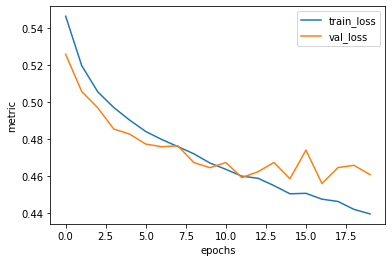

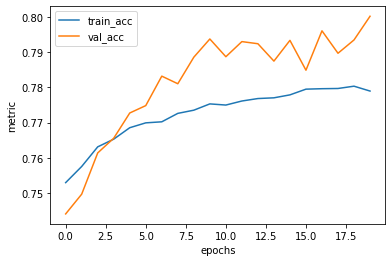

In [7]:
plot_training_history(history, metrics=['loss', 'acc'])

In [ ]:
preds = predict_on_test_set(
    patch_cnn,
    normalize=True, 
    submission_fn="patch_cnn_baseline_image_norm.csv",
    use_patches=True,
)

### Weighted Loss
Since there are much more background patches than road patches in the segmentation masks (3.1x more in the training set), we can adjust the training loss such that positive labels (road) have a higher weight.

In [12]:
n_pos = 0
n_neg = 0

for image_fn in image_fns:
    if "-1" in image_fn:
        n_pos += 1
    else:
        n_neg += 1

print(f"Total number of patches:\t\t{len(image_fns)}")
print(f"Total number of pos. patches:\t{n_pos}")
print(f"Total number of neg. patches:\t{n_neg}")
print(f"#neg. / #pos. pixels:\t{float(n_neg) / n_pos}")

Total number of patches:		90000
Total number of pos. patches:	22189
Total number of neg. patches:	67811
#neg. / #pos. pixels:	3.056063815404029


In [13]:
patch_cnn = PatchCNN().to(device)
history = train_model(
    model=patch_cnn,
    image_fns_train=image_fns[:-10*625],
    mask_fns_train=None,
    image_fns_val=image_fns[-10*625:],
    mask_fns_val=None,
    n_epochs=20,
    batch_size=128,
    normalize=True,
    pos_weight=3.1,
    use_patches=True,
)

Number of training samples:	83750
Number of validation samples:	6250


Epoch 1/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 1.014796128239769
  	- val_loss = 0.9669584178761464
  	- acc = 0.6512429690543022
  	- val_acc = 0.6408626546665114
 


Epoch 2/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.9636513275803118
  	- val_loss = 0.9380273431919514
  	- acc = 0.6762712183799452
  	- val_acc = 0.7159312428260336
 


Epoch 3/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.9407020578700881
  	- val_loss = 0.9118621179378731
  	- acc = 0.6897047006446897
  	- val_acc = 0.7138976466899015
 


Epoch 4/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.9235750693646602
  	- val_loss = 0.9029181345898717
  	- acc = 0.7044495781869379
  	- val_acc = 0.6683523058891296
 


Epoch 5/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.9113004536894651
  	- val_loss = 0.8900379359579303
  	- acc = 0.6761531990903025
  	- val_acc = 0.6988442199570792
 


Epoch 6/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8987447669577022
  	- val_loss = 0.8750814861839524
  	- acc = 0.679308331649722
  	- val_acc = 0.7092468470943217
 


Epoch 7/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8866354418784652
  	- val_loss = 0.8875375599769009
  	- acc = 0.6888113951865044
  	- val_acc = 0.6603532920078355
 


Epoch 8/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8786997913829155
  	- val_loss = 0.8714878242630206
  	- acc = 0.6877498493849776
  	- val_acc = 0.6701181652594586
 


Epoch 9/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8704430955171968
  	- val_loss = 0.8650243540653547
  	- acc = 0.6917455554918478
  	- val_acc = 0.6708040529367875
 


Epoch 10/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.864522457831753
  	- val_loss = 0.8551765863269651
  	- acc = 0.6895182553138441
  	- val_acc = 0.7060851466899015
 


Epoch 11/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8557734178318958
  	- val_loss = 0.8476518016090271
  	- acc = 0.6948379118023937
  	- val_acc = 0.6837306265928307
 


Epoch 12/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8525390872430396
  	- val_loss = 0.8510087095458458
  	- acc = 0.6972874397539911
  	- val_acc = 0.6847203507715341
 


Epoch 13/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8458746262994556
  	- val_loss = 0.8569665274342138
  	- acc = 0.6987068099829987
  	- val_acc = 0.6559491717085546
 


Epoch 14/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8357802509406972
  	- val_loss = 0.8561763362040101
  	- acc = 0.6998876305936858
  	- val_acc = 0.6751871157665642
 


Epoch 15/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8339985550648525
  	- val_loss = 0.8544046660615549
  	- acc = 0.7005467807973614
  	- val_acc = 0.7241017283225546
 


Epoch 16/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8288155394977578
  	- val_loss = 0.8528760457734313
  	- acc = 0.7025518532017715
  	- val_acc = 0.6971625916811884
 


Epoch 17/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8249277586276836
  	- val_loss = 0.8472234561994507
  	- acc = 0.701930368583621
  	- val_acc = 0.7065243550709316
 


Epoch 18/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.820002362336449
  	- val_loss = 0.8551405973980385
  	- acc = 0.705645465031835
  	- val_acc = 0.7076524593392197
 


Epoch 19/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8138880772084714
  	- val_loss = 0.8519835298985937
  	- acc = 0.7059317245738197
  	- val_acc = 0.6745493606645234
 


Epoch 20/20:   0%|          | 0/655 [00:00<?, ?it/s]

	- loss = 0.8076418978438914
  	- val_loss = 0.8552286913700404
  	- acc = 0.7085262655301858
  	- val_acc = 0.6918289138346302
 
Finished Training


Now, the loss of course has a different scale and needs to be interpreted differently. However, the weighted loss shows no advantage with respect to the patch F1 score.

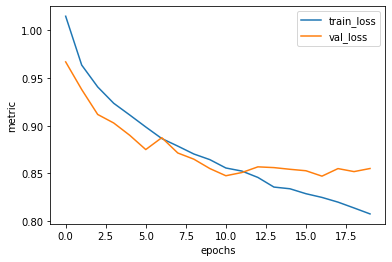

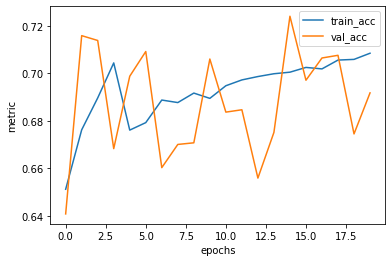

In [14]:
plot_training_history(history, metrics=['loss', 'acc'])

### Dataset Augmentation

Since we have very few training samples, we can create an extended dataset by applying random flips, rotations and color jitters. Please see *augmentation_experiments.ipynb* for more information. Let us generate 10 new samples from each original sample.

In [16]:
augment_dataset(
    imgs=load_pil_images(os.path.join("training", "images")), 
    masks=load_pil_images(os.path.join("training", "groundtruth")),
    n_samples_per_img=10,
    dir="training_ext",
    brightness=0.1, 
    contrast=0.1, 
    saturation=0.1, 
    hue=0.05
)

Image 1440/1440


In [ ]:
# Create the patch dataset
if not os.path.isdir("training_ext_patch"):
    imgs = load_images(os.path.join("training_ext", "images"))
    masks = load_images(os.path.join("training_ext", "groundtruth"))
    create_patch_dataset_training(
        imgs, 
        masks,
        class_label=None, # optional implicit class label 
        dir="training_ext_patch", # directory name of the new extended dataset
    )

Now, we have a dataset that is 10x larger! Let us retrain our baseline model on the extended dataset. Note that there is no information leakage in the following code cell. Since there are 10 versions of each original sample, we select the last 100 new samples for the validation set. This way, there are no two versions of the same original sample where one version is in the training set and the other one in the validation set.

In [20]:
image_fns = sorted(glob(os.path.join("training_ext_patch", "images", "*.png")))

patch_cnn = PatchCNN().to(device)
history = train_model(
    model=patch_cnn,
    image_fns_train=image_fns[:-100*625],
    mask_fns_train=None,
    image_fns_val=image_fns[-100*625:],
    mask_fns_val=None,
    n_epochs=20,
    batch_size=128,
    normalize=True,
    use_patches=True,
)

Number of training samples:	837500
Number of validation samples:	62500


Epoch 1/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.5232167312334524
  	- val_loss = 0.4923106393320219
  	- acc = 0.7577539928167507
  	- val_acc = 0.7690084639990012
 


Epoch 2/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4953157695529654
  	- val_loss = 0.47525749398066935
  	- acc = 0.769577065857656
  	- val_acc = 0.7761499517290626
 


Epoch 3/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4870659820358105
  	- val_loss = 0.4700901318972229
  	- acc = 0.7747121015200643
  	- val_acc = 0.7832470603271984
 


Epoch 4/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4826030256751788
  	- val_loss = 0.4703412916868214
  	- acc = 0.7767952884826823
  	- val_acc = 0.781331657631997
 


Epoch 5/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4795609360932818
  	- val_loss = 0.46347451115085353
  	- acc = 0.7787200168934361
  	- val_acc = 0.7904205010224948
 


Epoch 6/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.47773576748684254
  	- val_loss = 0.47171363476812483
  	- acc = 0.7794576156818956
  	- val_acc = 0.7856435327198364
 


Epoch 7/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4760105069019263
  	- val_loss = 0.4618382589992123
  	- acc = 0.7806017604348638
  	- val_acc = 0.7863784509202454
 


Epoch 8/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4744033311650509
  	- val_loss = 0.4597404154867312
  	- acc = 0.7809696354196284
  	- val_acc = 0.7902802629948638
 


Epoch 9/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4730461531589186
  	- val_loss = 0.4610015754478172
  	- acc = 0.7814749387377139
  	- val_acc = 0.7909370740010938
 


Epoch 10/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4718937821167856
  	- val_loss = 0.457029402084431
  	- acc = 0.7826510140077065
  	- val_acc = 0.791540630024635
 


Epoch 11/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.47110854787197737
  	- val_loss = 0.45973457986910266
  	- acc = 0.7827906763172835
  	- val_acc = 0.7899873608948019
 


Epoch 12/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4695903533444438
  	- val_loss = 0.4569922777677242
  	- acc = 0.7833110012265496
  	- val_acc = 0.793472009202454
 


Epoch 13/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4695084334531688
  	- val_loss = 0.4569110169326399
  	- acc = 0.7835211879923204
  	- val_acc = 0.7894867643988206
 


Epoch 14/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.46877483490520283
  	- val_loss = 0.46212240136379745
  	- acc = 0.7840127792905708
  	- val_acc = 0.7886080578548533
 


Epoch 15/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.46861338454282975
  	- val_loss = 0.4537534050972666
  	- acc = 0.7841253642111803
  	- val_acc = 0.7945921382045941
 


Epoch 16/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.46746134955492663
  	- val_loss = 0.4532291827935807
  	- acc = 0.78463517400662
  	- val_acc = 0.7927548427035715
 


Epoch 17/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4672137654560773
  	- val_loss = 0.4518564309752056
  	- acc = 0.7845347604309949
  	- val_acc = 0.7963229237402387
 


Epoch 18/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4667724882235729
  	- val_loss = 0.4527256196277852
  	- acc = 0.784581635507735
  	- val_acc = 0.7932518887617349
 


Epoch 19/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.4658978036370451
  	- val_loss = 0.45254106054049476
  	- acc = 0.7851368952522616
  	- val_acc = 0.7942566320696247
 


Epoch 20/20:   0%|          | 0/6543 [00:00<?, ?it/s]

	- loss = 0.46519042688359946
  	- val_loss = 0.4541353415413388
  	- acc = 0.7857991549630933
  	- val_acc = 0.7917323478160461
 
Finished Training


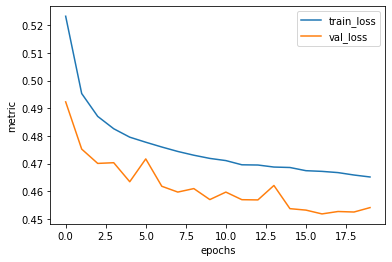

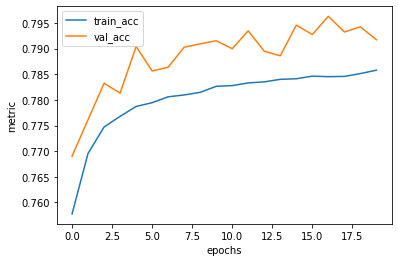

In [22]:
plot_training_history(history, metrics=['loss', 'acc'])

In [24]:
preds = predict_on_test_set(
    patch_cnn, 
    normalize=True, 
    submission_fn="patch_cnn_baseline_augmentation.csv",
    use_patches=True,
)

  0%|          | 0/90000 [00:00<?, ?it/s]

Created submission file: submissions/patch_cnn_baseline_augmentation.csv


We score 0.804 on the leaderboard, which is not an improvement.